<a href="https://colab.research.google.com/github/md-kamran98/YES-BANK-CLOSING-PRICE-PREDICTION/blob/main/KAMRAN_YES_BANK_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Yes Bank Stock Price Closing Prediction**



##### **Project Type**    - Capstone Project 2 ((Supervised - Regression)
##### **Contribution**    - Individual


## **GitHub Link -**

My GitHub Link is here - https://github.com/md-kamran98

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

#### **Define Your Business Objective?** 

***Predict The Stock’s Closing Price Of The Month.***

## **Project Summary**

The time series model can be used to predict the stock's closing price of the month. The time series model is a statistical technique that uses past data points to predict future values. This model can be used to analyse the behavior of the stock and make an informed decision about the stock's future. By using this model, the analyst can identify the trends in the stock's historical prices and forecast the future prices. The analyst can also make use of the various indicators such as moving averages, Bollinger Bands, MACD, etc. to make better predictions. Furthermore, the analyst can also incorporate external factors such as news, economic data, and other relevant data to make more accurate predictions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]







# ***Let's Begin !***

**Importing Libraries**

In [1]:
# importing All The Required Libraries

import warnings                                        
warnings.filterwarnings('ignore')

import numpy as np                                     
import pandas as pd                                    

import matplotlib.pyplot as plt                        
%matplotlib inline
import missingno as msno
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px                       

from datetime import datetime                          


from dateutil.relativedelta import relativedelta       
from datetime import datetime                          
from scipy.optimize import minimize                    
import copy                                            

from sklearn.preprocessing import (MinMaxScaler,       
StandardScaler)         
from sklearn.model_selection import train_test_split   
from sklearn.model_selection import (cross_val_score,  
TimeSeriesSplit)

from sklearn.linear_model import LinearRegression      
from xgboost import XGBRegressor                       
from sklearn.ensemble import RandomForestRegressor     
from sklearn.svm import SVR                            
from sklearn.linear_model import (Lasso, Ridge,        
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       

from sklearn.metrics import (r2_score,                 
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

from statsmodels.tsa.stattools import adfuller         
import statsmodels.formula.api as smf                  
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

**Reading the Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/ML capstone project./data_YesBank_StockPrices.csv"
dataset = pd.read_csv("/content/drive/MyDrive/ML capstone project./data_YesBank_StockPrices.csv")

**Data Inspection**

In [6]:
# First look on the DataSet.
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count (Over View Of DataSet)

In [7]:
# Dataset Rows & Columns 
dataset.shape

(185, 5)

###Information Of Dataset

In [8]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [9]:
# convert string object to datetime object
dataset['Date'] = dataset['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

**Missing Values/Null Values**

In [10]:
#Checking for null values
print(dataset.isnull().sum())

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


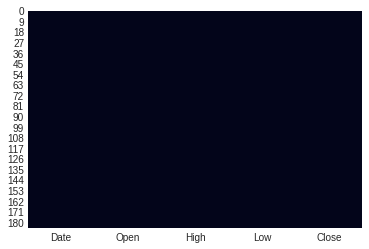

In [11]:
# Visualizing the missing values
print(sns.heatmap(dataset.isnull(), cbar=False))

*   We have a total of 185 entries.
*   No null values.
*   Date column is of 'object' datatype we have to convert it to 'datetime'.








#### Duplicate Values Count

In [12]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

### **What did you know about your dataset?**

The dataset given is a dataset from YES Bank (an Indian financial domain), and we have to analysis the stock’s closing price and the insights behind it.

The prediction is analytical studies on the possibility of stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month.. The goal is to understand and take steps to change and predict the stock’s closing price of the
month.

The above dataset has 185 rows and 05 columns. There are no mising values and no duplicate values in the dataset. 

## **Understanding The Variables**

In [13]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [14]:
# Dataset Describe
dataset.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,2005-07-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,2005-07-01 00:00:00,NaN,NaN,NaN,NaN
last,2020-11-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000


### **Variables Description**

**Date:** date of record

**Open:** opening price

**High:** higest price of the day

**Low:** lowest price of the day

**Close:** Occupations of the speaker


**Check the Unique Values for each variable.**

In [15]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  Date is 185 .
No. of unique values in  Open is 183 .
No. of unique values in  High is 184 .
No. of unique values in  Low is 183 .
No. of unique values in  Close is 185 .


### ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Creating a copy of the current dataset and assigning to df
df = dataset.copy()

# Checking Shape of True Value
print("close price of stock : -",len(df[df['Close']==True]))

# Assigning Close data to variable df_close
df_close =df[(df['Close']==True)]

close price of stock : - 0


### ***Exploratory Data Analysis***

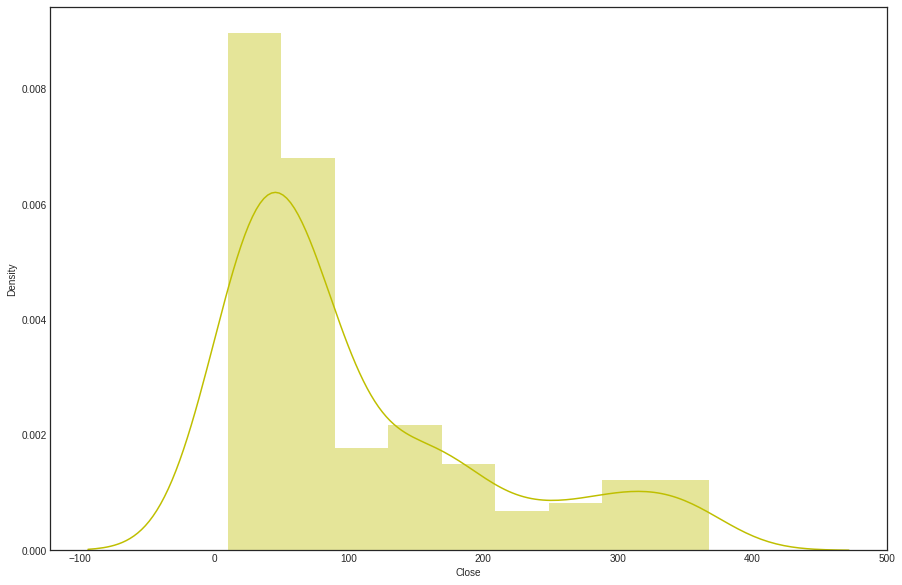

In [17]:
#dependent variable 'Close' price of stock 
plt.figure(figsize=(15,10))
sns.distplot(dataset['Close'],color="y") 

*Here we can see after doing Exploratory Data Analysis on our data set the distplot shows that our data distribution is low-level skewed in this situation we can use log transformation for normalizing the data, let's check the log function and see the result of our data set.*

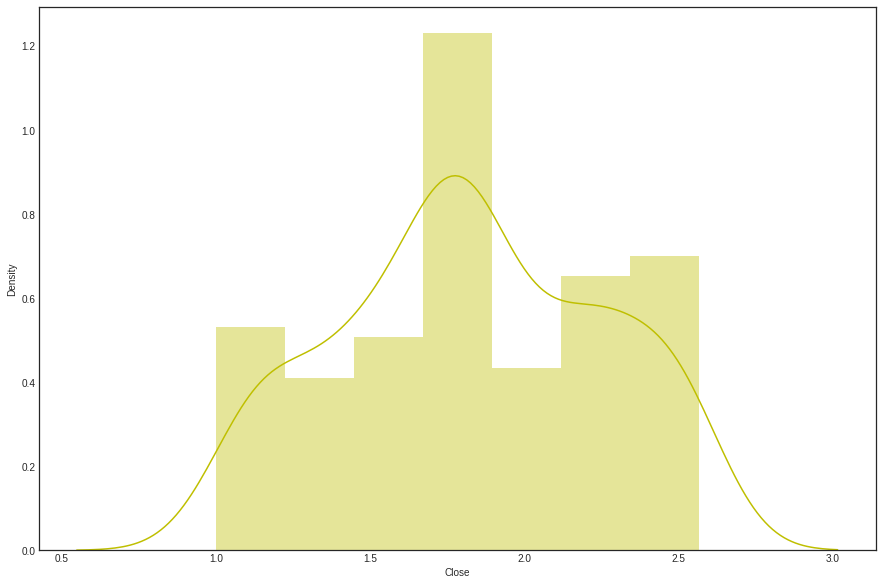

In [18]:
# Dependent variable 'closing price '
plt.figure(figsize=(15,10))
sns.distplot(np.log10(dataset['Close']),color="y")

*After applying the log transformation, we can now see that our data is normally distributed so we can easily analyze our data sets.*

In [19]:
numeric_features = dataset.describe().columns

In [20]:
# visualise the data
fig = px.line(df, df['Date'], df['Close'], title='Monthly closing price')
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Closing price'),
    autosize=False,
    width=1400,
    height=400)

fig.show()

*Here we can easily see the 'Monthly closing price' through this Visualise Graph for each year till Nov - 2020.*

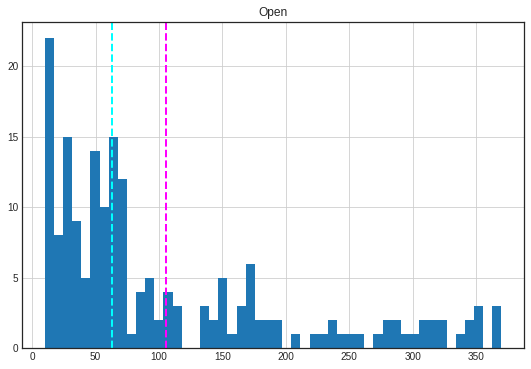

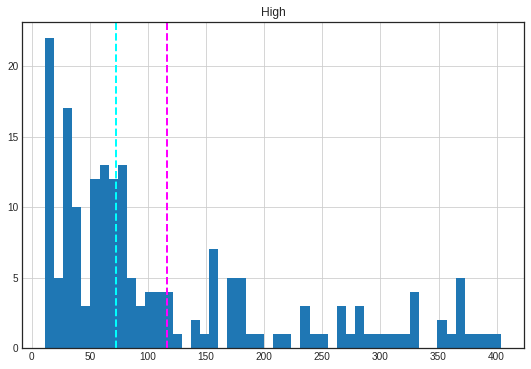

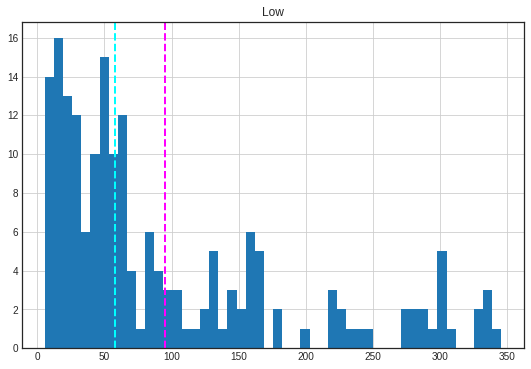

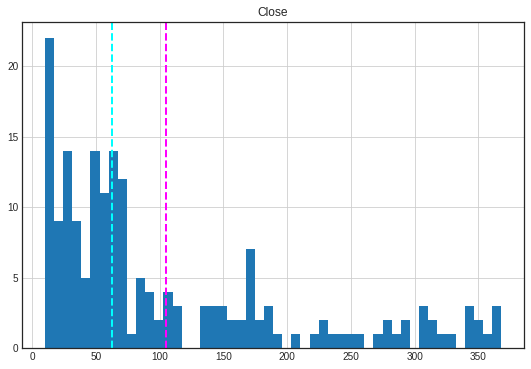

In [21]:
# Check for skewness in the dataset
numeric_features = df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

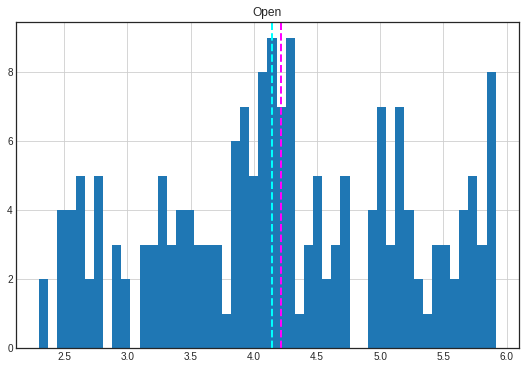

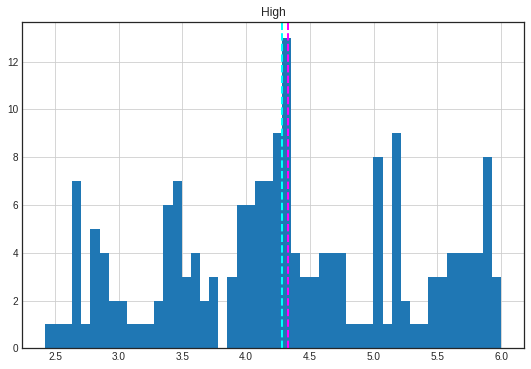

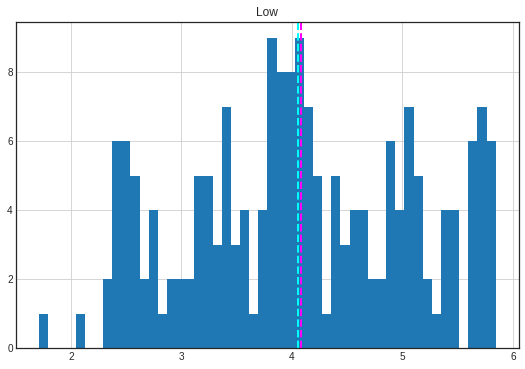

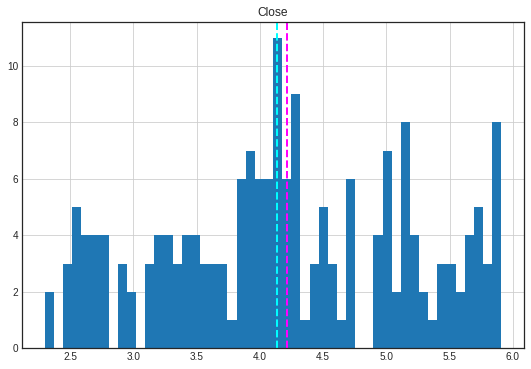

In [22]:
# plot a bar plot for each categorical feature count.

for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [23]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

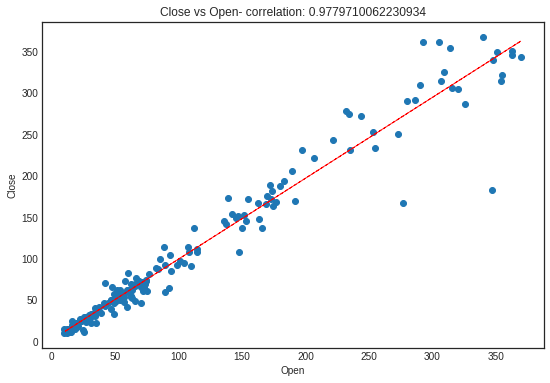

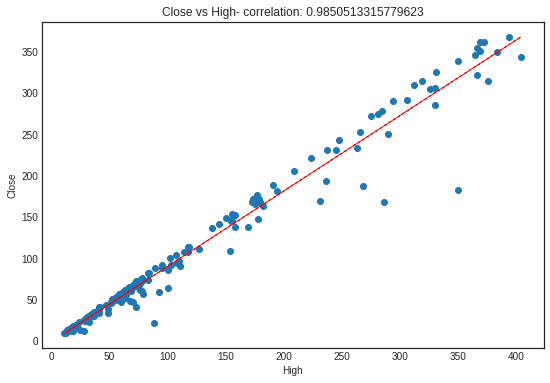

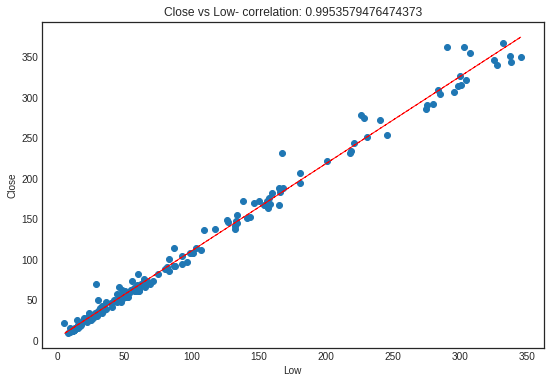

In [24]:
# Applying scatter plot to see the relationship between dependent & independent variables
for col in numeric_features[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Close'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

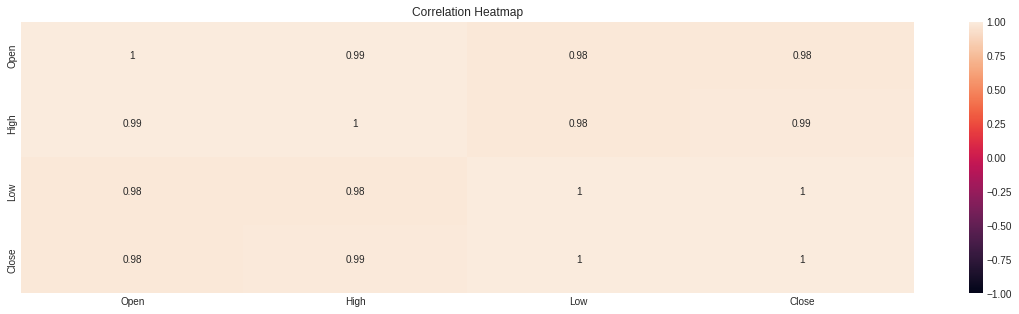

In [25]:
# check for existence of corelation
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
cor = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=None, annot=True )

*Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features*

## **Feature Engineering**

In [26]:
# Creating a new feature based on average of other features in the dataset.
df['OHL'] = df[['Open', 'High', 'Low']].mean(axis=1).round(2)
df.head()

,Date,Open,High,Low,Close,OHL
0,2005-07-01,13.00,14.00,11.25,12.46,12.75
1,2005-08-01,12.58,14.88,12.55,13.42,13.34
2,2005-09-01,13.48,14.87,12.27,13.30,13.54
3,2005-10-01,13.20,14.47,12.40,12.99,13.36
4,2005-11-01,13.35,13.88,12.88,13.41,13.37


*Linear regression also assumes a linear relationship between the target variables and independent variables, let's check if such relationship exists through a scatter plot.*

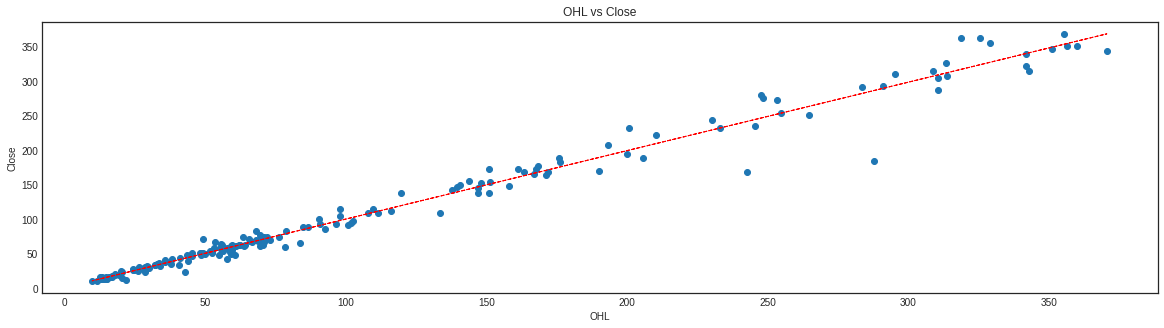

In [27]:
# Applying scatter plot to see the relationship between dependent & independent variables
fig = plt.figure(figsize=(20,5))
ax = fig.gca()
plt.scatter(df['OHL'], df['Close'])
plt.xlabel('OHL')
plt.ylabel('Close')
ax.set_title('OHL vs Close')
z = np.polyfit(df['OHL'], df['Close'], 1)
y_hat = np.poly1d(z)(df['OHL'])
plt.plot(df['OHL'], y_hat, "r--", lw=1)
plt.show()

In [28]:
# using lags as additional features
for i in range(1, 13):
    df["lag_{}".format(i)] = df.OHL.shift(i)

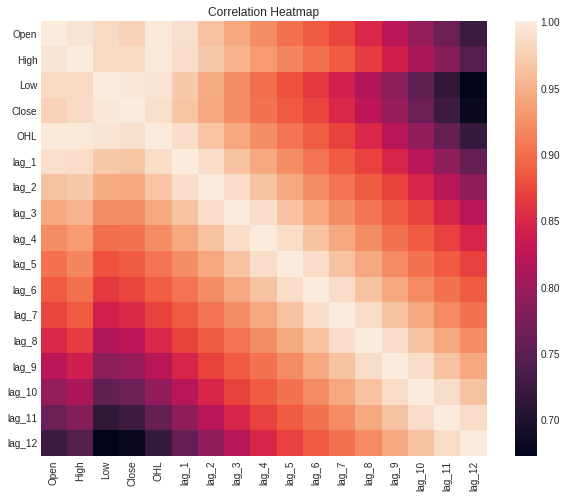

In [29]:
# Checking correlation between features.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()
     

## **Train-Test Split**

In [30]:
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
TimeSeriesSplit)

In [31]:
# Applying 5 fold time-series cross-validation 
tscv = TimeSeriesSplit(n_splits=5)

In [32]:
# function for splitting time-series dataset
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    scaler = StandardScaler()
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [33]:

# choose appropriate dependent and independent variables
y = df.dropna().Close
X = df.dropna().drop(['Date','Close','Open','High','Low'], axis=1)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.2)

## **Model Building**
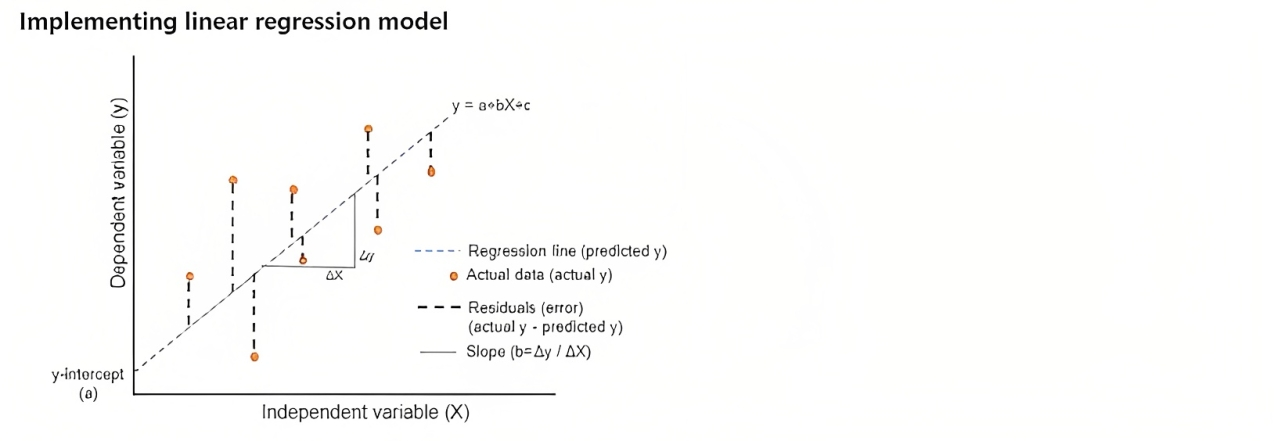

In [34]:
from sklearn.linear_model import LinearRegression 
# initialize and fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

# function to plot model performance
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_testupper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);


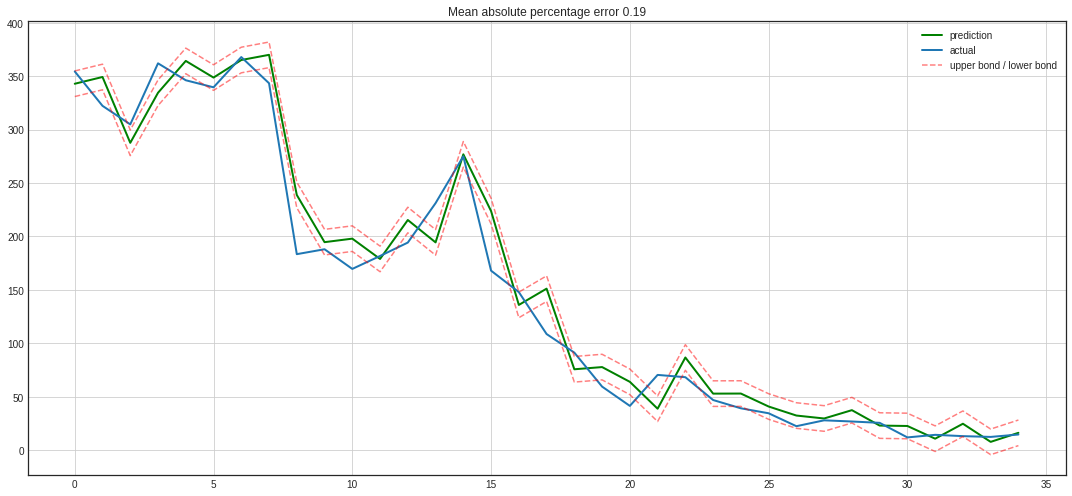

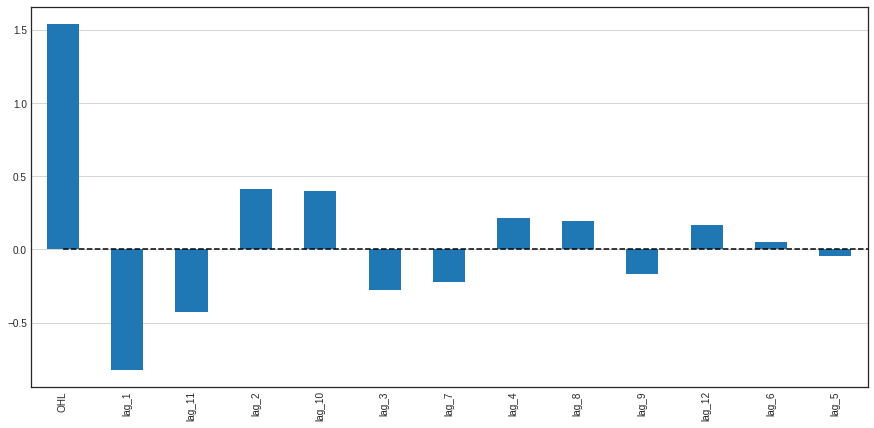

In [36]:
# function to plot coefficients   
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')

plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

mean absolute error: 16.93

mean squared error: 486.35

root mean squared error: 22.05

r2_score: 0.97

mean absolute percentage error: 0.19





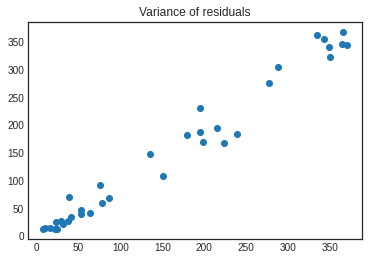

In [37]:
# make predictions
lr_y_pred = lr.predict(X_test)

# evaluate predictions
lr_mae = round(mean_absolute_error(y_test, lr_y_pred),2)
print('mean absolute error: {}\n'.format(lr_mae))
lr_mse = round(mean_squared_error(y_test, lr_y_pred),2)
print('mean squared error: {}\n'.format(lr_mse))
lr_rmse = round(np.sqrt(lr_mse),2)
print('root mean squared error: {}\n'.format(lr_rmse))
lr_r2 = round(r2_score(y_test, lr_y_pred),2)
print('r2_score: {}\n'.format(lr_r2))
lr_mape = round(mean_absolute_percentage_error(lr_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(lr_mape))

# Check for homoscadacity
plt.scatter(lr_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

## **Implementing Ridge Regression**

In [38]:
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters

from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

In [39]:
# initialize and fit ridge regression
ridge = RidgeCV(cv=tscv)
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
        cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None))

In [40]:
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
        cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None))

In [41]:
y_pred_r = ridge.predict(X_test)

mean absolute error: 16.91

mean squared error: 488.09

root mean squared error: 22.09

r2_score: 0.97

mean absolute percentage error: 0.19





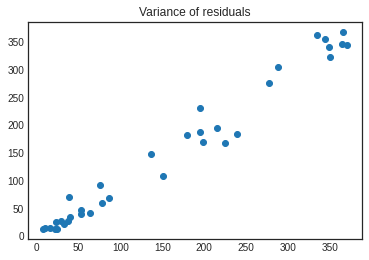

In [42]:
# Making Predictions
r_y_pred = ridge.predict(X_test)

# evaluate predictions
r_mae = round(mean_absolute_error(r_y_pred, y_test),2)
print('mean absolute error: {}\n'.format(r_mae))
r_mse = round(mean_squared_error(r_y_pred, y_test),2)
print('mean squared error: {}\n'.format(r_mse))
r_rmse = round(np.sqrt(r_mse),2)
print('root mean squared error: {}\n'.format(r_rmse))
r_r2 = round(r2_score(r_y_pred, y_test),2)
print('r2_score: {}\n'.format(r_r2))
r_mape = round(mean_absolute_percentage_error(r_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(r_mape))

# Check for homoscadacity
plt.scatter(r_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

## **Implementing lasso regressiont**

In [45]:
# initialize and fit lasso regression
lasso = LassoCV(cv=tscv)
lasso.fit(X_train, y_train)

LassoCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None))

mean absolute error: 16.87

mean squared error: 626.48

root mean squared error: 25.03

r2_score: 0.96

mean absolute percentage error: 0.16





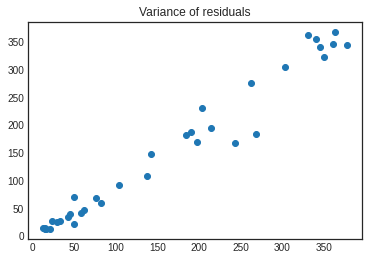

In [44]:
# Making Predictions
l_y_pred = lasso.predict(X_test)

# evaluate predictions
l_mae = round(mean_absolute_error(y_test, l_y_pred),2)
print('mean absolute error: {}\n'.format(l_mae))
l_mse = round(mean_squared_error(y_test, l_y_pred),2)
print('mean squared error: {}\n'.format(l_mse))
l_rmse = round(np.sqrt(l_mse),2)
print('root mean squared error: {}\n'.format(l_rmse))
l_r2 = round(r2_score(y_test, l_y_pred),2)
print('r2_score: {}\n'.format(l_r2))
l_mape = round(mean_absolute_percentage_error(l_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(l_mape))

# Check for homoscadacity
plt.scatter(l_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

## **Implementing elasticnet regression**

In [46]:
# initialize and fit elasticnet regression
elasticnet = ElasticNetCV(cv=tscv)
elasticnet.fit(X_train, y_train)

ElasticNetCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None))

mean absolute error: 18.34

mean squared error: 726.63

root mean squared error: 26.96

r2_score: 0.95

mean absolute percentage error: 0.16





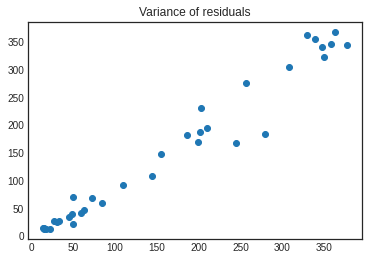

In [47]:
# Making Predictions
e_y_pred = elasticnet.predict(X_test)

# evaluate predictions
e_mae = round(mean_absolute_error(y_test, e_y_pred),2)
print('mean absolute error: {}\n'.format(e_mae))
e_mse = round(mean_squared_error(y_test, e_y_pred),2)
print('mean squared error: {}\n'.format(e_mse))
e_rmse = round(np.sqrt(e_mse),2)
print('root mean squared error: {}\n'.format(e_rmse))
e_r2 = round(r2_score(y_test, e_y_pred),2)
print('r2_score: {}\n'.format(e_r2))
e_mape = round(mean_absolute_percentage_error(e_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(e_mape))

# Check for homoscadacity
plt.scatter(e_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

## **Evaluation Summary**

In [48]:
# create dataframe with evaluation metrics
model_report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression'], 'mae':[lr_mae,r_mae,l_mae,e_mae], 'mse':[lr_mse,r_mse,l_mse,e_mse],'rmse':[lr_rmse,r_rmse,l_rmse,e_rmse],'r2_score':[lr_r2,r_r2,l_r2,e_r2],'mape':[lr_mape,r_mape,l_mape,e_mape]})
model_report 
     

,model,mae,mse,rmse,r2_score,mape
0,linear regression,16.93,486.35,22.05,0.97,0.19
1,ridge regression,16.91,488.09,22.09,0.97,0.19
2,lasso regression,16.87,626.48,25.03,0.96,0.16
3,elastic net regression,18.34,726.63,26.96,0.95,0.16


## **Model pipeline**

In [49]:
# Seting up the Model Pipeline
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

## **Implementing Random Forest Regressor**

In [50]:
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR 

In [51]:
# Initialize and fit random forests regressor
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100,150,200],
     'max_depth': [20,30,50,100]
}
start = datetime.now()
model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=tscv)
end = datetime.now()
execution_time = round((end - start).seconds/60,2)
print(f'The computational cost for finding the best fit random forest regressor model: {execution_time} minutes\n')
# Root Mean Squared Error
print(f'Best score: {np.sqrt(-model.best_score_)}\n')
print(f'Best parameters: {model.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The computational cost for finding the best fit random forest regressor model: 0.2 minutes

Best score: 58.50753634940066

Best parameters: {'max_depth': 100, 'n_estimators': 150}


In [52]:
# Best Fit Model
rfr = model.best_estimator_

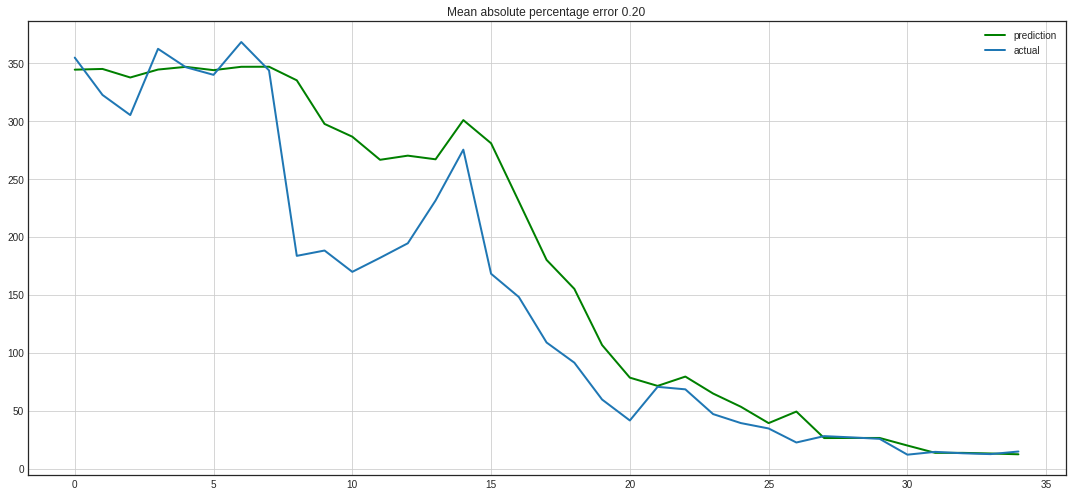

In [53]:
# Evaluate The Model
plotModelResults(rfr, 
                 X_train, 
                 X_test, 
                plot_anomalies=True)

## **Implementing XGBoost Regressor**

In [54]:
# Initialize and fit xgboost regressor
model = XGBRegressor()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}
start = datetime.now()
model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=tscv)
end = datetime.now()
execution_time = round((end - start).seconds/60,2)
print(f'The computational cost for finding the best fit XGBoost regressor model: {execution_time} minutes\n')
# Root Mean Squared Error
print(f'Best score: {np.sqrt(-model.best_score_)}\n')
print(f'Best parameters: {model.best_params_}')
     

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[07:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The computational cost for finding the best fit XGBoost regressor model: 3.2 minutes

Best score: 66.07007559384817

Best parameters: {'colsample_bytree': 0.8, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.8}


In [55]:
# Best Fit model
xgb = model.best_estimator_

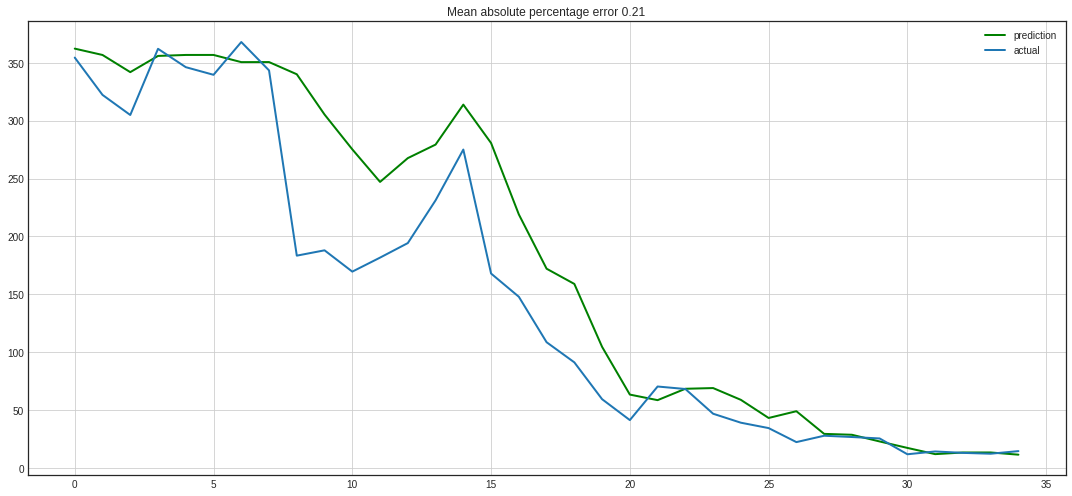

In [56]:
# Evaluate The Model
plotModelResults(xgb, 
                 X_train, 
                 X_test, 
                plot_anomalies=True)

In [81]:
reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
regressor = RandomForestRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)

In [82]:
# Define all these models.
models = [
          ['LinearRegression:', LinearRegression()],
          ['Lasso:', Lasso()],
          ['Ridge:', Ridge()],
          ['RandomForestRegressor:', RandomForestRegressor()],
          ['XGBRegressor:', XGBRegressor()]
          ]

In [85]:
# create dataframe with evaluation metrics
model_report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression'], 'mae':[lr_mae,r_mae,l_mae,e_mae], 'mse':[lr_mse,r_mse,l_mse,e_mse],'rmse':[lr_rmse,r_rmse,l_rmse,e_rmse],'r2_score':[lr_r2,r_r2,l_r2,e_r2],'mape':[lr_mape,r_mape,l_mape,e_mape]})
model_report 

,model,mae,mse,rmse,r2_score,mape
0,linear regression,16.93,486.35,22.05,0.97,0.19
1,ridge regression,16.91,488.09,22.09,0.97,0.19
2,lasso regression,16.87,626.48,25.03,0.96,0.16
3,elastic net regression,18.34,726.63,26.96,0.95,0.16


## **Moving Average**
A moving average much better than a naive forecast **(\hat{y}_t = y_{t-1}
)**. A moving average is the average of previous  values.



In [57]:
# function for calculating moving average

def moving_average(series, n):
  
  """
  Calculate average of last n observation
  """
  
  return round(np.average(series[-n:]),2)

moving_average(df['Close'],12) # prediction for next month closing price using observed previous 12 months data

24.18

*Unfortunately we can make only one prediction, to make further predictions we need to have the actual observed values. However moving average can be used to identify the trends by smoothing the time series using a pandas implementation DataFrame.rolling(window).mean().italicized tex*

In [58]:
# Set back up the date column
# df = df.reset_index()
# df['Date'] = df_date

# function for plotting moving average
def ma(series, window, plot_intervals=False):

  """
  series - dataframe column with timeseries
  window - rolling window size
  """

  rolling_mean = series.rolling(window=window).mean()

  plt.figure(figsize=(20,5))
  plt.title('Moving average \n window size = {}'.format(window))
  plt.plot(df['Date'], rolling_mean, "g", label = "Rolling mean trend")
  
  # plotting confidence intervals
  if plot_intervals:
    mae = mean_absolute_error(series[window:], rolling_mean[window:])
    deviation = np.std(series[window] - rolling_mean[window:])
    lower_bound = rolling_mean - (mae + deviation)
    upper_bound = rolling_mean + (mae + deviation)
    plt.plot(df['Date'], lower_bound, "r--", label = "Upper/Lower bounds")
    plt.plot(df['Date'], upper_bound, "r--")
  
  plt.plot(df['Date'], series, label = "Actual values")
  plt.legend(loc="upper left")
  plt.grid(True)
  plt.show()
     

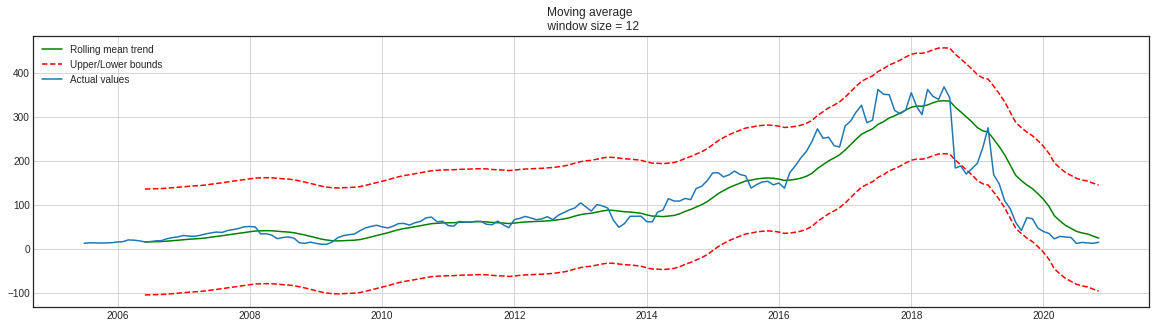

In [59]:
# Plotting 12 months moving average 
ma(df['Close'],12, plot_intervals=True) # smoothing by previous 12 months

In [60]:
# Function that returns weighted moving average
def wma(series, weights):
  """
  calculate weighted moving average of the series
  """
  result = 0.0
  for w in range(len(weights)):
    result += series.iloc[-w-1] * weights[w]
    return float(result)

wma(df['Close'], weights = [0.5, 0.3, 0.2])

7.335

## **Now let's extend this concept of weighted averages to exponentially weighted moving averages**
*Exponentially weighted moving averages weights all the available observations while exponentially decreasing the weights as we move back values*

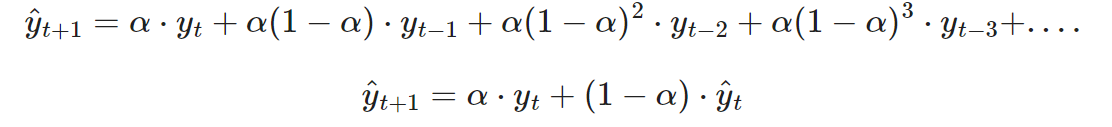

In [61]:
# Function that does exponential smoothing
def exponential_smoothing(series, alpha):
  """
  series - dataframe column with timeseries
  alpha - smoothing parameter
  """
  result = [series[0]]
  for n in range(len(series)):
    result.append(alpha * series[n] + (1 - alpha) * result[n-1])
  return result

In [62]:
# Function to plot exponentail moving averages
def ema(series, alphas):
  """
  series - dataframe colummn with time series
  alpha - smoothing parameters
  """
  with plt.style.context('seaborn-white'):
    plt.figure(figsize=(20,5))
    for alpha in alphas:
      plt.plot(exponential_smoothing(series, alpha), label = "Alpha{}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.legend(loc="best")
    plt.grid(True)


In [63]:
# Making prediction
round(exponential_smoothing(df['Close'], alpha=0.2)[-1],2)

53.87

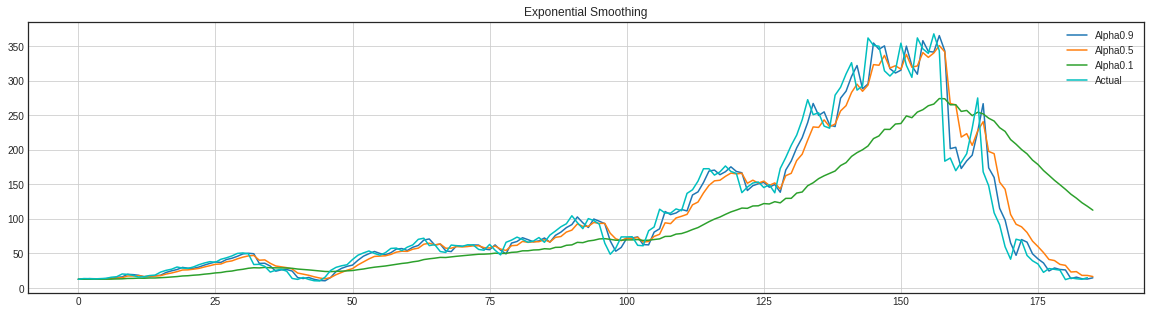

In [64]:
# Plot ema
ema(df['Close'], [0.9, 0.5, 0.1])

## **Getting rid of non stationarity**

In [65]:
# Function to take lags
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

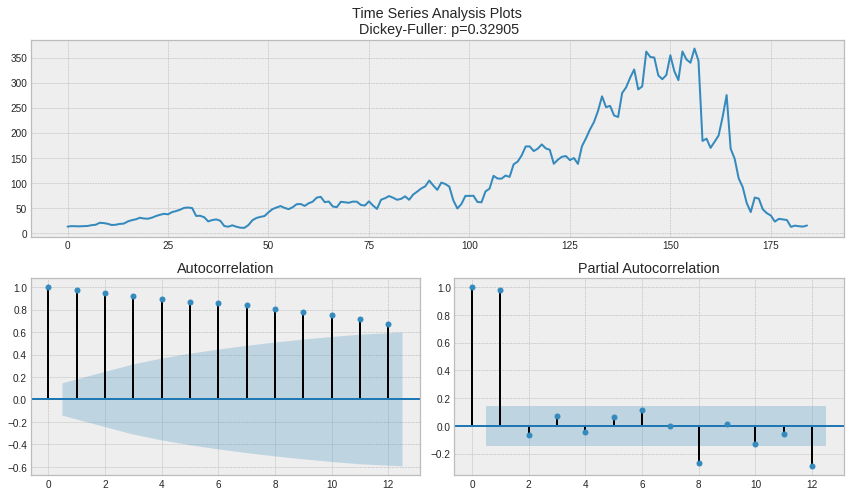

In [66]:
# Plot to check stationarity
tsplot(df['Close'], lags=12)

*The autocorrelation function still has too many significant lags. To remove them, we'll subtract the series from itself with lag 1*

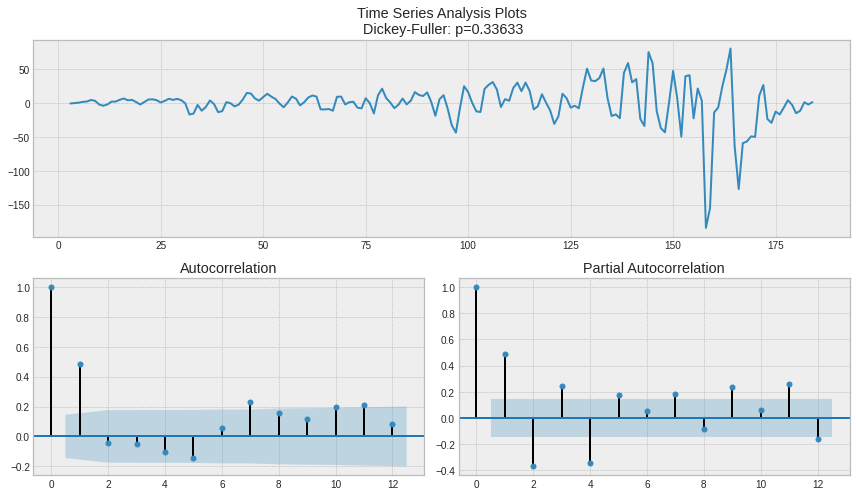

In [67]:
# Differnce transform
diff = df['Close'] - df['Close'].shift(2)
tsplot(diff[3:], lags=12)

**ARIMA - Parameters**

 

*  p: Trend autoregression order 
*  d: Trend difference order.
*  q: Trend moving average order.

is most probably 2 since it is the last significant lag on the PACF, after which, most of the others are not significant. equals to 1 because we had first differences should be somewhere around 7 as well as seen on the ACF.

In [70]:
from datetime import datetime   # to convert to date
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  180
Model:                 ARIMA(2, 1, 7)   Log Likelihood                -796.760
Method:                       css-mle   S.D. of innovations             19.459
Date:                Sat, 10 Dec 2022   AIC                           1615.521
Time:                        07:19:59   BIC                           1650.643
Sample:                             1   HQIC                          1629.761
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0692      0.053     -1.312      0.189      -0.173       0.034
ar.L1.D.Close     0.0495      0.057      0.862      0.389      -0.063       0.162
ar.L2.D.Close    -0.8507      0.049    -

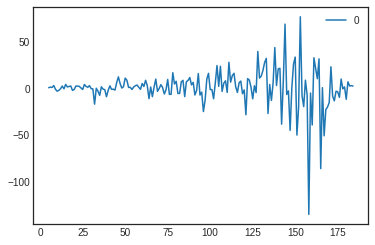

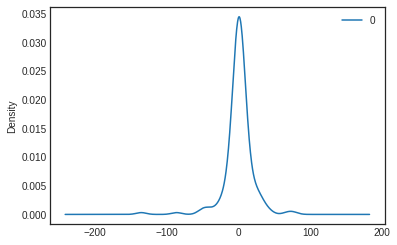

                0
count  180.000000
mean     0.699859
std     19.772918
min   -134.973361
25%     -3.872621
50%      1.353967
75%      7.002415
max     76.628469


In [71]:
# fit model
model = ARIMA(diff[4:], order=(2,1,7))
model = model.fit()

# summary of fit model
print(model.summary())

# line plot of residuals
residuals = pd.DataFrame(model.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

In [88]:
# create series
diff = pd.Series(data=diff[5:])
diff1 = [0]*5
for i in diff:
  diff1.append(i*(-1)) 
diff1 = pd.Series(data=diff1)
diff1 = diff1[5:]

In [89]:
# plot MAPE of ARIMA
def plotARIMA(series, model, n_steps, d=1):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted ARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    # data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on d steps from the beginning
    error = mean_absolute_percentage_error(diff1[d:], data['arima_model'][d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.plot(diff1, label="actual")
    plt.legend()
    plt.grid(True);

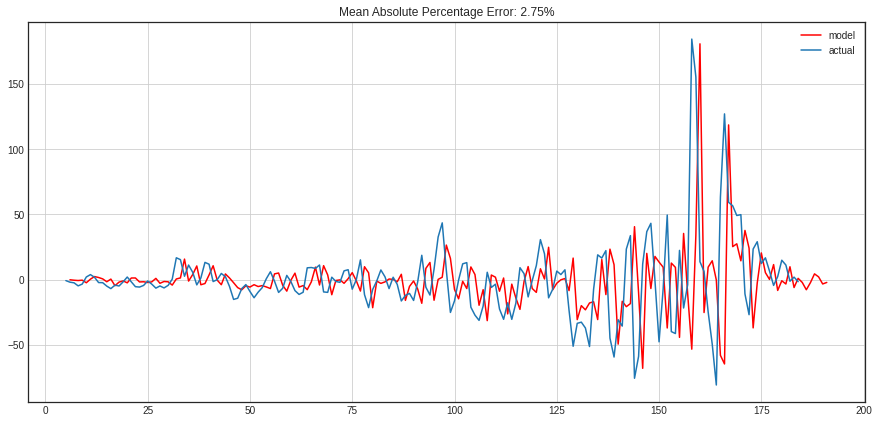

In [90]:
# model predictions vs actual
plotARIMA(diff1, model, 6)

## **Conclusion**

**-We started with data inspection, viewed the data distribution, checked for correlation and used averaged features to remove correlation.**

**-A simple linear regression model was built and it was evaluated using accuracy, mean squared error, root mean squared error, r2_score and mean absolute percentage error.**

**-Additional features were engineered by taking lags and reduced the effect of multi collinearity using regularization techniques such as ridge, lasso and elastic net regression.**

**-Regression models namely random forest regressor, xgboost regressor and elastic net regression were built.**

**-The time component was brought in and used averaging techniques like moving average, exponentially weighted moving average and double exponentially weighted moving average to do time-series analysis.**

**-Presence of non stationarity was detected, made it stationary by taking lags and difference transformation and built an ARIMA model.**